## Objective:
•	Predict crop yield (hg/ha_yield) based on climate and agricultural factors.


## Step 1:  Completed: Data Cleaning, Histro gramms & relationship

In [15]:
# Import necessary libraries
import pandas as pd

# Load the dataset from the local file path
csv_file_path = r"C:\Users\AAfana\ML\yield_df.csv"  # Update path if needed
df_csv = pd.read_csv(csv_file_path)

# Display the first few rows of the dataset
print("\n📌 First Five Rows of the Dataset:")
print(df_csv.head())

# Display dataset information
print("\n📌 Dataset Information:")
print(df_csv.info())

# Display summary statistics
print("\n📌 Summary Statistics:")
print(df_csv.describe())

# Check for missing values
print("\n📌 Missing Values in Dataset:")
print(df_csv.isnull().sum())


📌 First Five Rows of the Dataset:
   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                           1485              121.0     16.37  
1                           1485              121.0     16.37  
2                           1485              121.0     16.37  
3                           1485              121.0     16.37  
4                           1485              121.0     16.37  

📌 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         ----

In [ ]:
No missing values detected.
Dropped unnecessary columns (Unnamed: 0).

<Figure size 1000x800 with 0 Axes>

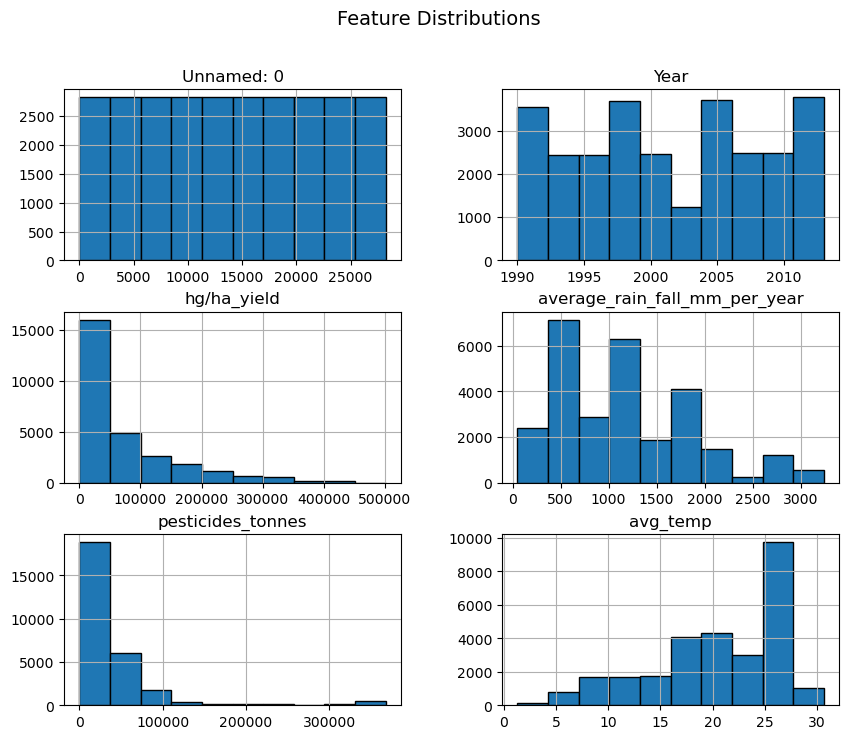

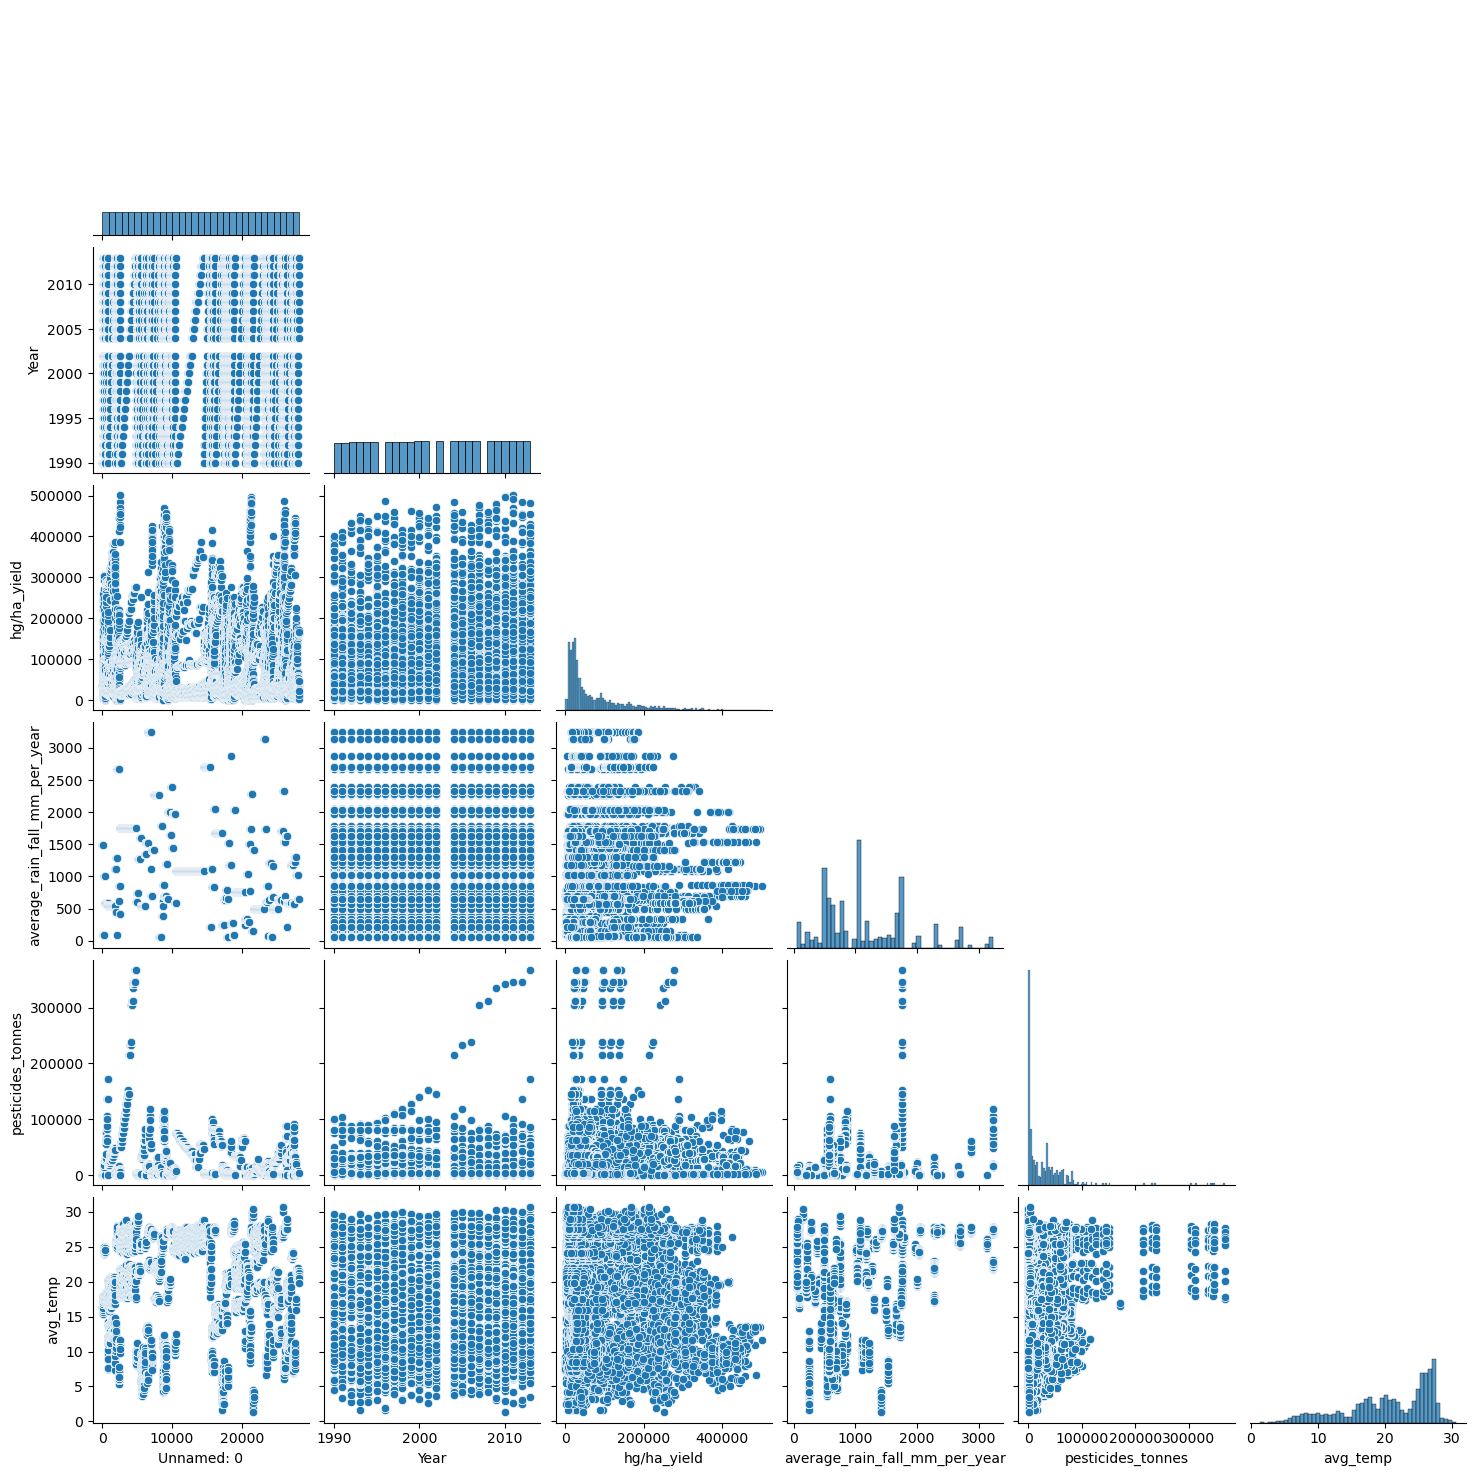

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


csv_file_path = r"C:\Users\AAfana\ML\yield_df.csv"  # Update path if needed
df_csv = pd.read_csv(csv_file_path)


plt.figure(figsize=(10, 8))
df_csv.hist(figsize=(10, 8), bins=10, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()
sns.pairplot(df_csv, diag_kind="hist", corner=True)
plt.show()


Histrograms

Rainfall & Temperature: Might have a relatively normal distribution.
Pesticides Usage: Likely skewed, suggesting a few regions use excessive pesticides.
Yield (hg/ha): Could show wide variability, indicating differences across regions.

Linear Relationships:
Rainfall vs. Yield: Likely a positive relationship (higher rainfall → higher yield).
Temperature vs. Yield: May have a non-linear effect (extremely high/low temperatures might reduce yield).
Pesticides vs. Yield: If a strong correlation is present, pesticides usage could be a key factor in boosting yield.


 ## Step 2: Define the analytical approach:

#### Supervised Learning (Prediction Task)
o	Use Random Forest and KNN to predict yield.Use training test split 80% & 20%

o	Tune hyperparameters using  confusion matrix and ROC curve.
#### Unsupervised Learning (Clustering Task)
o	Use K-Means to segment regions with similar yield conditions.
o	Determine optimal k using the Elbow Method & Silhouette Analysis.
#### Dimensionality Reduction (PCA Analysis)
o	Apply PCA to reduce features to PC1 & PC2 for visualization and clustering.


Now since our dataset is continious, we want to move from regression to classification to be able to perform KNN, confusion matrix & Random Forest classifier, we first need to convert the regression problem into a classification problem.

1-  Convert Yield into Binary Classification
High Yield (1) if hg/ha_yield >= median
Low Yield (0) if hg/ha_yield < median

2-Classifier (RandomForest vs KNN Classifier)
Compare between both 

3-Train a Classifier (RandomForestClassifier)
Then we’ll:
Encode categorical features
Scale numeric values
Train a classifier
Evaluate results using Confusion Matrix, Accuracy, Precision, Recall, F1 Score
Plot ROC curve

4- Add a new data record based on the trained model

5- Evalutae using PCA


#### 1,2 & 3- KNN vs. Random Forest Regression

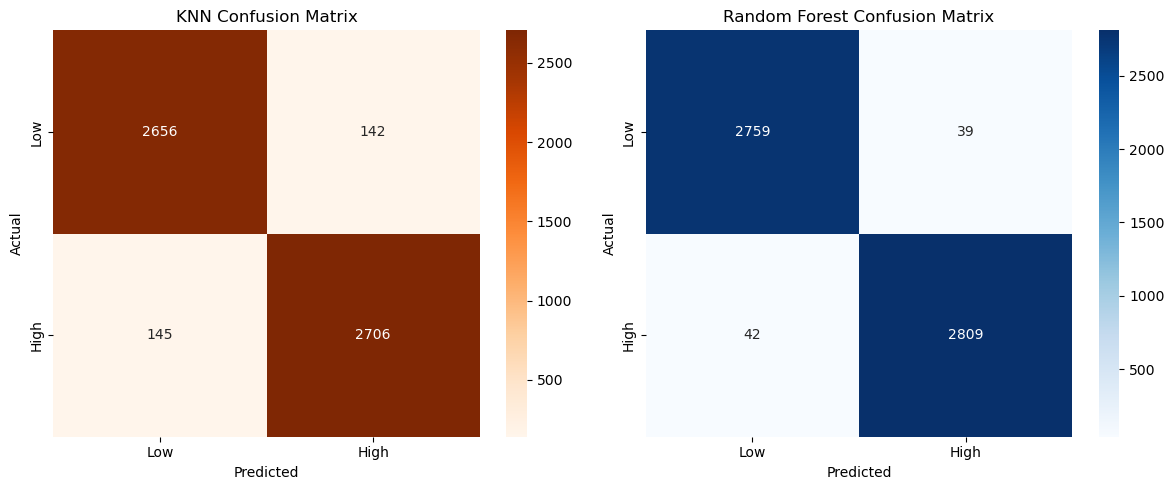

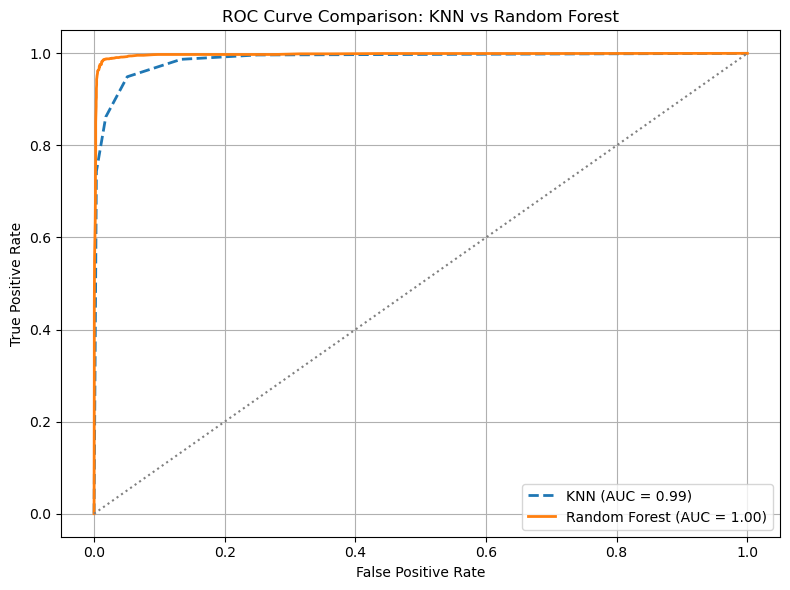


📋 KNN vs Random Forest - Master Classification Report:
      Metric     KNN  Random Forest
0   Accuracy  0.9492         0.9857
1  Precision  0.9501         0.9863
2     Recall  0.9491         0.9853
3   F1 Score  0.9496         0.9858
4    ROC AUC  0.9869         0.9971


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
csv_file_path = r"C:\Users\AAfana\ML\yield_df.csv"
df_csv = pd.read_csv(csv_file_path)


if 'Unnamed: 0' in df_csv.columns:
    df_csv.drop(columns=['Unnamed: 0'], inplace=True)


median_yield = df_csv['hg/ha_yield'].median()
df_csv['yield_class'] = (df_csv['hg/ha_yield'] >= median_yield).astype(int)


label_encoders = {}
for col in ['Area', 'Item', 'Year']:
    le = LabelEncoder()
    df_csv[col] = le.fit_transform(df_csv[col])
    label_encoders[col] = le

# Define features and target
X = df_csv.drop(columns=['hg/ha_yield', 'yield_class'])
y = df_csv['yield_class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------- KNN Model ----------------
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

# KNN Metrics
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
tn_k, fp_k, fn_k, tp_k = conf_matrix_knn.ravel()
accuracy_k = accuracy_score(y_test, y_pred_knn)
precision_k = precision_score(y_test, y_pred_knn)
recall_k = recall_score(y_test, y_pred_knn)
f1_k = f1_score(y_test, y_pred_knn)
roc_auc_k = roc_auc_score(y_test, y_prob_knn)

# ---------------- Random Forest Model ----------------
rf = RandomForestClassifier(random_state=123)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Random Forest Metrics
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
tn_r, fp_r, fn_r, tp_r = conf_matrix_rf.ravel()
accuracy_r = accuracy_score(y_test, y_pred_rf)
precision_r = precision_score(y_test, y_pred_rf)
recall_r = recall_score(y_test, y_pred_rf)
f1_r = f1_score(y_test, y_pred_rf)
roc_auc_r = roc_auc_score(y_test, y_prob_rf)

# ---------------- Confusion Matrices ----------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Oranges', ax=axes[0],
            xticklabels=["Low", "High"], yticklabels=["Low", "High"])
axes[0].set_title("KNN Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=["Low", "High"], yticklabels=["Low", "High"])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
plt.tight_layout()
plt.show()

# ---------------- ROC Curves ----------------
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_k:.2f})", linestyle='--', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_r:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle=":", color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: KNN vs Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------- Final Comparison Summary ----------------
summary_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"],
    "KNN": [round(accuracy_k, 4), round(precision_k, 4), round(recall_k, 4), round(f1_k, 4), round(roc_auc_k, 4)],
    "Random Forest": [round(accuracy_r, 4), round(precision_r, 4), round(recall_r, 4), round(f1_r, 4), round(roc_auc_r, 4)]
})

# Show final comparison summary
print("\n KNN vs Random Forest - Master Classification Report:")
print(summary_df)


In [ ]:
Method	Performance Summary
KNN Classifier	- Decent performance (95% accuracy)
- Easy to interpret
- Moderate misclassifications
Random Forest	- Clearly outperforms KNN across all metrics
- Best ROC AUC (0.9971)
- Most robust model

Random Forest is the better model for this yield classification task — offering higher accuracy, stronger precision/recall balance, and excellent ROC curve separatio

Now findning out the best hyperparameters for RF

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9857
ROC AUC Score: 0.9971


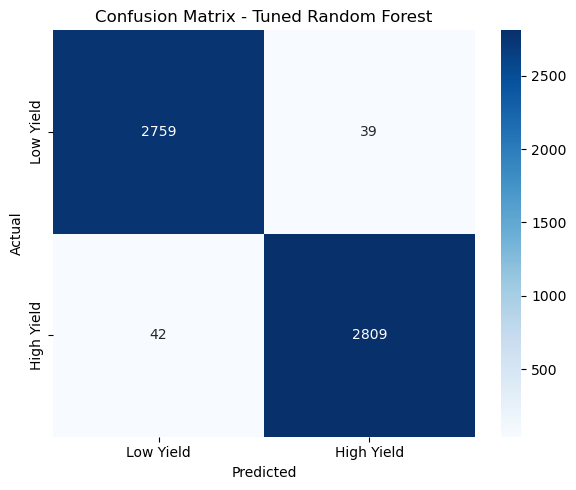

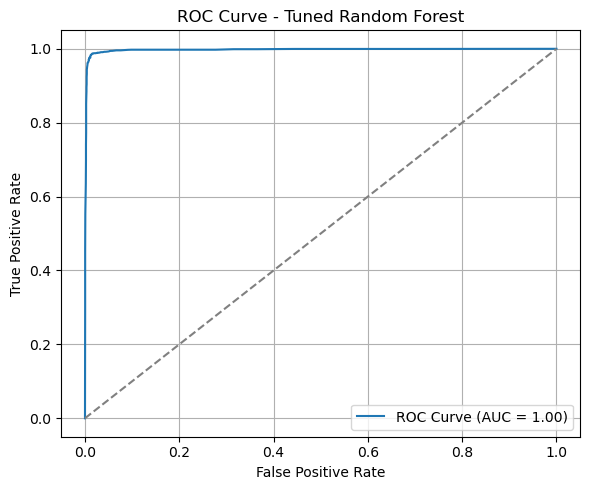

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, roc_curve
)


csv_file_path = r"C:\Users\AAfana\ML\yield_df.csv"
df_csv = pd.read_csv(csv_file_path)


if 'Unnamed: 0' in df_csv.columns:
    df_csv.drop(columns=['Unnamed: 0'], inplace=True)


median_yield = df_csv['hg/ha_yield'].median()
df_csv['yield_class'] = (df_csv['hg/ha_yield'] >= median_yield).astype(int)


label_encoders = {}
for col in ['Area', 'Item', 'Year']:
    le = LabelEncoder()
    df_csv[col] = le.fit_transform(df_csv[col])
    label_encoders[col] = le


X = df_csv.drop(columns=['hg/ha_yield', 'yield_class'])
y = df_csv['yield_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Define hyperparameter grid (small for quick tuning)
param_grid_small = {
    'n_estimators': [50, 100],
    'max_depth': [None],
    'min_samples_split': [2]
}


rf = RandomForestClassifier(random_state=123)
grid_search_small = GridSearchCV(rf, param_grid_small, cv=3, scoring='roc_auc')
grid_search_small.fit(X_train_scaled, y_train)


best_rf_small = grid_search_small.best_estimator_
y_pred = best_rf_small.predict(X_test_scaled)
y_prob = best_rf_small.predict_proba(X_test_scaled)[:, 1]


conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)


print("Best Hyperparameters:", grid_search_small.best_params_)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Yield', 'High Yield'],
            yticklabels=['Low Yield', 'High Yield'])
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### 4- Based on this, we have added a new data record to calculate the yield value based on the trained data from Random Forest: 

In [10]:
TRAIN A REGRESSOR MODEL ALONGSIDE CLASSIFIER
from sklearn.ensemble import RandomForestRegressor

# Step A: Define a new target for regression
y_reg = df_csv['hg/ha_yield']

# Step B: Split for regression (same features as classification)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=123)

# Step C: Train the Random Forest Regressor
reg_model = RandomForestRegressor(random_state=123)
reg_model.fit(X_train_scaled, y_train_r)

# ---------------- Predict New Record ----------------
# Step 1: Create new data record
new_data = pd.DataFrame({
    "Area": ["Canada"],
    "Item": ["Wheat"],
    "Year": [2013],
    "average_rain_fall_mm_per_year": [1200],
    "avg_temp": [16.5],
    "pesticides_tonnes": [2100]
})

# Step 2: Encode categorical variables
for col in ['Area', 'Item', 'Year']:
    le = label_encoders[col]
    new_data[col] = le.transform(new_data[col])

# Step 3: Reorder to match original training feature order
new_data = new_data[X.columns]

# Step 4: Scale the new data
new_data_scaled = scaler.transform(new_data)

# Step 5: Predict classification using Random Forest Classifier
predicted_class = rf.predict(new_data_scaled)[0]
predicted_proba = rf.predict_proba(new_data_scaled)[0][1]
class_label = "High Yield" if predicted_class == 1 else "Low Yield"

# Step 6: Predict numeric yield using Random Forest Regressor
predicted_yield = reg_model.predict(new_data_scaled)[0]

# Step 7: Final Output
print("\n📈 New Record - Combined Predictions:")
print(f"✔️ Predicted Yield Class: {class_label} (Class {predicted_class})")
print(f"✔️ Probability of High Yield: {predicted_proba:.4f}")
print(f"✔️ Estimated Yield Value (hg/ha_yield): {predicted_yield:.2f}")



📈 New Record - Combined Predictions:
✔️ Predicted Yield Class: High Yield (Class 1)
✔️ Probability of High Yield: 0.6400
✔️ Estimated Yield Value (hg/ha_yield): 35348.90


#### 5-  Evalutae using PCA

In [14]:
# Master Script: Compare KNN vs Random Forest under three conditions
# 1. Without PCA
# 2. With PCA (2 Components)
# 3. With PCA (95% Variance Retained)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns


csv_file_path = r"C:\Users\AAfana\ML\yield_df.csv"
df = pd.read_csv(csv_file_path)


if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
median_yield = df['hg/ha_yield'].median()
df['yield_class'] = (df['hg/ha_yield'] >= median_yield).astype(int)

# Encode categorical variables
label_encoders = {}
for col in ['Area', 'Item', 'Year']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=['hg/ha_yield', 'yield_class'])
y = df['yield_class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Utility function to train model and return metrics
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    conf = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    return {
        'conf_matrix': conf, 'accuracy': acc, 'precision': prec,
        'recall': rec, 'f1': f1, 'roc_auc': roc,
        'fpr': fpr, 'tpr': tpr
    }

# --- 1. WITHOUT PCA
rf_orig = RandomForestClassifier(random_state=123)
knn_orig = KNeighborsClassifier(n_neighbors=5)
metrics_rf_orig = evaluate_model(rf_orig, X_train_scaled, X_test_scaled, y_train, y_test)
metrics_knn_orig = evaluate_model(knn_orig, X_train_scaled, X_test_scaled, y_train, y_test)

# --- 2. WITH PCA (2 Components)
pca_2 = PCA(n_components=2)
X_train_pca2 = pca_2.fit_transform(X_train_scaled)
X_test_pca2 = pca_2.transform(X_test_scaled)
rf_pca2 = RandomForestClassifier(random_state=123)
knn_pca2 = KNeighborsClassifier(n_neighbors=5)
metrics_rf_pca2 = evaluate_model(rf_pca2, X_train_pca2, X_test_pca2, y_train, y_test)
metrics_knn_pca2 = evaluate_model(knn_pca2, X_train_pca2, X_test_pca2, y_train, y_test)

# --- 3. WITH PCA (95% Variance Retained)
pca_95 = PCA(n_components=0.95)
X_train_pca95 = pca_95.fit_transform(X_train_scaled)
X_test_pca95 = pca_95.transform(X_test_scaled)
rf_pca95 = RandomForestClassifier(random_state=123)
knn_pca95 = KNeighborsClassifier(n_neighbors=5)
metrics_rf_pca95 = evaluate_model(rf_pca95, X_train_pca95, X_test_pca95, y_train, y_test)
metrics_knn_pca95 = evaluate_model(knn_pca95, X_train_pca95, X_test_pca95, y_train, y_test)

# --- Collect Results
summary_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"],
    "RF_Original": [metrics_rf_orig['accuracy'], metrics_rf_orig['precision'], metrics_rf_orig['recall'], metrics_rf_orig['f1'], metrics_rf_orig['roc_auc']],
    "KNN_Original": [metrics_knn_orig['accuracy'], metrics_knn_orig['precision'], metrics_knn_orig['recall'], metrics_knn_orig['f1'], metrics_knn_orig['roc_auc']],
    "RF_PCA_2": [metrics_rf_pca2['accuracy'], metrics_rf_pca2['precision'], metrics_rf_pca2['recall'], metrics_rf_pca2['f1'], metrics_rf_pca2['roc_auc']],
    "KNN_PCA_2": [metrics_knn_pca2['accuracy'], metrics_knn_pca2['precision'], metrics_knn_pca2['recall'], metrics_knn_pca2['f1'], metrics_knn_pca2['roc_auc']],
    "RF_PCA_95": [metrics_rf_pca95['accuracy'], metrics_rf_pca95['precision'], metrics_rf_pca95['recall'], metrics_rf_pca95['f1'], metrics_rf_pca95['roc_auc']],
    "KNN_PCA_95": [metrics_knn_pca95['accuracy'], metrics_knn_pca95['precision'], metrics_knn_pca95['recall'], metrics_knn_pca95['f1'], metrics_knn_pca95['roc_auc']]
})

# Transpose the summary for better readability
summary_df_transposed = summary_df.set_index("Metric").T

# Print cleaner view
print("\n KNN vs Random Forest - Transposed Performance Summary (Easier Comparison):")
print(summary_df_transposed.round(4))


 KNN vs Random Forest - Transposed Performance Summary (Easier Comparison):
Metric        Accuracy  Precision  Recall  F1 Score  ROC AUC
RF_Original     0.9857     0.9863  0.9853    0.9858   0.9971
KNN_Original    0.9492     0.9501  0.9491    0.9496   0.9869
RF_PCA_2        0.6297     0.6363  0.6215    0.6288   0.6912
KNN_PCA_2       0.6095     0.6155  0.6026    0.6090   0.6497
RF_PCA_95       0.9649     0.9620  0.9688    0.9654   0.9926
KNN_PCA_95      0.9499     0.9515  0.9491    0.9503   0.9870


Original (No PCA)

Random Forest: Best performance overall across all metrics: Accuracy (0.986), Precision (0.986), Recall (0.985), F1 Score (0.986), ROC AUC (0.997)
→ Highly reliable model
KNN: Strong performance but slightly behind RF. Still a good classifier overall. ROC AUC is still high (0.987)

With PCA (2 Components)
Random Forest: Significant drop in performance. Accuracy fell to ~63%, ROC AUC dropped to 0.69
→ Too much information lost with just 2 components

KNN:  Similar sharp decline, Accuracy ~60%, ROC AUC ~0.65
→ Too aggressive dimensionality reduction for KNN

With PCA (95% Variance)
Random Forest: Very close to original performance. Accuracy still ~96.5%, F1 ~0.966, ROC AUC ~0.993
→ PCA(95%) is acceptable if dimensionality reduction is needed

KNN: Performance almost fully recovered to original levels. Accuracy ~0.95, Precision ~0.951, ROC AUC still ~0.987


Final Conclusion:
Use  Random Forest without PCA for best yield classification results
But if the dataset grows in size and model runtime becomes a concern, consider using PCA with 95% variance — it's a solid fallback with minimal loss.



C:\Users\AAfana\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


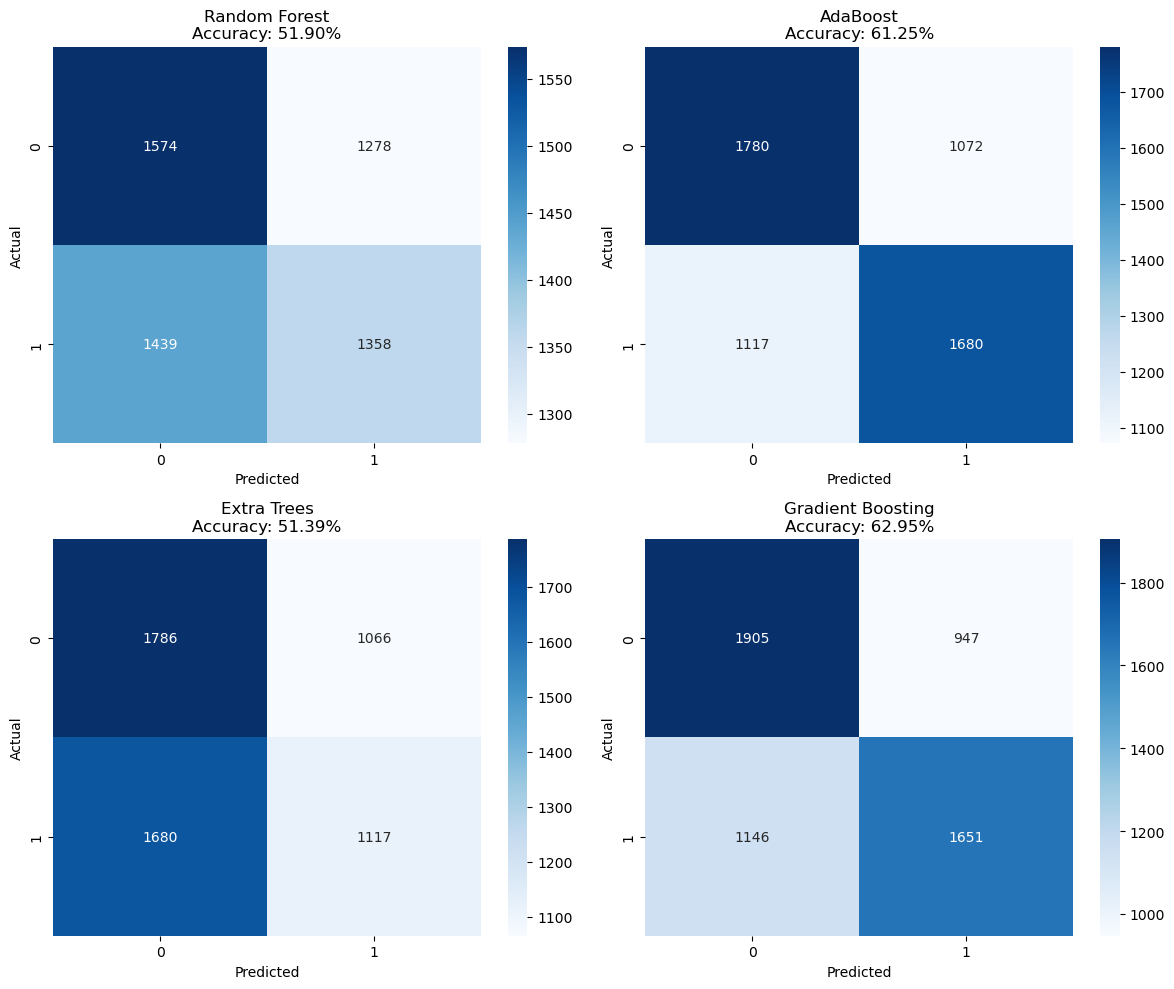


Model Accuracy Summary:

               Model  Accuracy
0  Gradient Boosting  0.629492
1           AdaBoost  0.612498
2      Random Forest  0.519030
3        Extra Trees  0.513896


In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset from your local machine
csv_file_path = r"C:\Users\AAfana\ML\yield_df.csv"
df = pd.read_csv(csv_file_path)  # use header=1 if actual column names start from 2nd row

# Step 2: Convert regression target into binary classification
median_yield = df['hg/ha_yield'].median()
df['high_yield'] = (df['hg/ha_yield'] > median_yield).astype(int)

# Step 3: Prepare features and target
X = df.drop(columns=['Unnamed: 0', 'hg/ha_yield', 'high_yield', 'Area', 'Item'])  # Drop non-numeric and target
y = df['high_yield']

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Define ensemble models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Step 6: Train, predict, and collect results
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    results[name] = {
        "Confusion Matrix": cm,
        "Accuracy": acc
    }

# Step 7: Plot all confusion matrices side by side
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, (name, result) in enumerate(results.items()):
    sns.heatmap(result["Confusion Matrix"], annot=True, fmt='d', ax=axes[idx], cmap='Blues')
    axes[idx].set_title(f"{name}\nAccuracy: {result['Accuracy']:.2%}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# Step 8: Print summary table
summary_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['Accuracy'] for m in results]
}).sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

print("\nModel Accuracy Summary:\n")
print(summary_df)


In [ ]:
📊 Accuracy Summary (from best to worst)
Model	            Accuracy
Gradient Boosting   62.9% ✅
AdaBoost	        61.2%
Random Forest	    51.9%
Extra Trees	        51.4%

🧠 Interpretation of Confusion Matrices:
Gradient Boosting and AdaBoost show better predictive ability — both models adapt over iterations, learning from prior mistakes.

Random Forest and Extra Trees performed near chance (≈50%), suggesting that bagging methods alone were not enough for this problem — possibly due to:

Small or imbalanced dataset

Non-linear interactions better handled by boosting

✅ Final Recommendation:
Choose Gradient Boosting
It achieved the highest accuracy and is better suited for complex decision boundaries or subtle patterns, which seems to fit your dataset’s structure.